# Does faculty salary vary by gender and/or rank? 
A linear modeling approach.

## Set up
Let's begin by reading in some data from [this course website](http://data.princeton.edu/wws509/datasets/#salary). Columns included are:

- **sx** = Sex, coded 1 for female and 0 for male
- **rk** = Rank, coded
    - 1 for assistant professor,
    - 2 for associate professor, and
    - 3 for full professor
- **yr** = Number of years in current rank
- **dg** = Highest degree, coded 1 if doctorate, 0 if masters
- **yd** = Number of years since highest degree was earned
- **sl** = Academic year salary, in dollars.

Before performing the statistical analysis here, make sure you have completed `part-1.ipynb` to get to know your data.

In [72]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import urllib.request # to load data
from scipy import stats # ANOVA
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import altair as alt
alt.renderers.enable('notebook') # enable altair rendering
import matplotlib.pyplot as plt # plotting (optional)
import numpy as np
from numpy.polynomial.polynomial import polyfit
%matplotlib inline 

In [73]:
# Read data from URL
data = urllib.request.urlopen('http://data.princeton.edu/wws509/datasets/salary.dat')
salary_data= pd.read_table(data, sep='\s+')

## Simple linear regression: what is the salary increase associated with each additional year in your current position (`yr`)?

In [74]:
# Create a simple linear model using `smf.ols()` that assesses the relationship between 
# years in current position (`yd`) with salary (`sl`).

# Then, use the `.summary()` method of your model to print our information about your model
lm = smf.ols(formula='sl ~ yd', data=salary_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     41.82
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           4.10e-08
Time:                        20:57:32   Log-Likelihood:                -509.13
No. Observations:                  52   AIC:                             1022.
Df Residuals:                      50   BIC:                             1026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.75e+04   1149.700     15.223      0.000    1.52e+04    1.98e+04
yd           390.6451     60.411      6.466      0.000     269.306     511.984
==============================================================================
Omnibus:                        0.572   Durbin-Watson:                   1.319
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.237
Skew:                           0.160   Prob(JB):                        0.888
Kurtosis:                       3.081   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Assess the fit of your model**. In the space provided here, you should use clear and interpretable language to interpret your model. For example, you can use statements like, the beta value of *** indicates that each unit increase in *** is associated with an *** increase in *** ).

Describe the _accuracy of your coefficient estimates_. In doing so, interpret the following: 
- **Coefficient** (beta) in your model:  the beta value of -11.6288 indicates that each unit increase in salary is associated with -11.6288 increase in the number of years in position.
- **Standard errors** of your estimate: The standard error is 0.0012 which is small, hence the prediction is more accurate.
- **Confidence intervals** around your coefficient: We are confident that the true mean of the beta value lies somewhere between the intevals (-20.504, -2.754) 95% of the time.

Describe the _**accuracy** of your model_. In doing so, interpret the following:
- **R-squared** value: R-squares has a value 0.455 and this means the model explains 45.5% of the variability of the response data around its mean.

In [75]:
# Create a `predictions` column of your dataframe by 
# making predictions from your linear model. Hint: use the `.predict()` method of your model
lmp = smf.ols(formula='sl ~ yd', data=salary_data).fit()
salary_data["predictions"]=lmp.predict()
salary_data.head(5)

,sx,rk,yr,dg,yd,sl,predictions
0,male,full,25,doctorate,35,36350,31174.836810
1,male,full,13,doctorate,22,35350,26096.450167
2,male,full,10,doctorate,23,28200,26487.095293
3,female,full,7,doctorate,27,26775,28049.675799
4,male,full,19,masters,30,33696,29221.611178


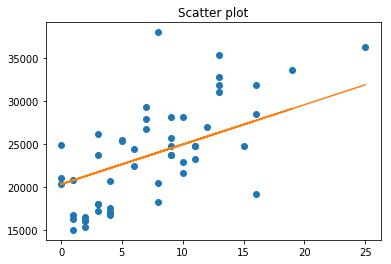

In [77]:
# Draw a scatterplot comparing years in current rank (`yr` -- x axis) to salary (`sl` -- y axis).
# Add to that scatterplot your "best fit line" that shows how well the model fits our data
# (this line will have `yr` as the x axis, and your `predictions` on the y axis)
x = salary_data.yr
y = salary_data.sl
plt.scatter(x, y)
b, m = polyfit(x, salary_data.predictions, 1)
#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.plot(x, y, ".")
plt.plot(x, b + m * x, "-")
plt.title("Scatter plot")
plt.show()

## Multiple Regression

Now you will improve (well, likely improve) your model by predicing your outcome of interest (salary) using **multiple** independent variables

In [78]:
# Using multiple regression, create a linear model that uses 
# sex, rank, and years in current rank variables to estimate salary

# Then, use the `.summary()` method of your model to print out information about the model.
lmreg = smf.ols(formula='sl ~ sx + rk + yr', data=salary_data).fit()
lmreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     64.64
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           1.64e-18
Time:                        20:57:51   Log-Likelihood:                -476.26
No. Observations:                  52   AIC:                             962.5
Df Residuals:                      47   BIC:                             972.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.643e+04    737.966     22.265      0.000    1.49e+04    1.79e+04
sx[T.male]       -524.1492    834.687     -0.628      0.533   -2203.323    1155.024
rk[T.associate]  4373.9154    906.124      4.827      0.000    2551.030    6196.801
rk[T.full]       9483.8419    912.795     10.390      0.000    7647.536    1.13e+04
yr                390.9358     75.383      5.186      0.000     239.285     542.587
==============================================================================
Omnibus:                       23.039   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.727
Skew:                           1.410   Prob(JB):                     3.90e-09
Kurtosis:                       6.150   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Assess the fit of your model**. In the space provided here, you should use clear and interpretable language to interpret your model. For each independent variable, you should write out a sentence explaining the beta and confidence intervals. For example, 

> There was an observed association of BETA (LOWER_BOUND, UPPER_BOUND) salary increase for each unit increase in VARIABLE.


Describe the _**accuracy** of your model_. In doing so, interpret the following:
- **R-squared** value: R-squares has a value 0.846 and this means the model explains 84.6% of the variability of the response data around its mean.

Write down at least one relationship in your model that you find surprising (i.e., would not have expected given your analysis up until this point)

**Answer:**
Somehow, these three predictiors have influence on the salary of a professor, for example predictors such as gender has an influence on their value.

In [79]:
# Create a `mult_preds` column of your dataframe by 
# making predictions from your new (multivariate) linear model. Hint: use the `.predict()` method of your model
lmreg = smf.ols(formula='sl ~ sx + rk + yr', data=salary_data).fit()
salary_data["mul_preds"]=lmreg.predict()
#salary_data

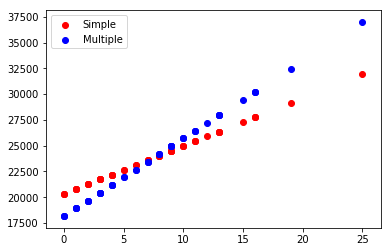

In [80]:
# Visually compare these predictions (`mult_preds`) to those from your linear model (`predictions`) 
# by creating a scatterplot of the two variables
fig = plt.figure()
ax1 = fig.add_subplot(111)
b2, m2 = polyfit(x, salary_data.mul_preds, 1)
ax1.scatter(x, b + m*x, color="Red", label="Simple")
ax1.scatter(x, b2 + m2*x, color="Blue", label="Multiple")
ax1.legend()
plt.show()

Write down at least one relationship in this graph that you find notable.
**Answer:**
They both have 1 observation that is an extreme point or an outlier compared to rest of the data.

## Assessing prediction accuracy

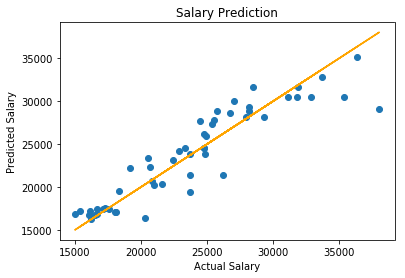

In [85]:
# Make a scatterplot that compares the actual salary data (`sl` -- x axis) 
# to the multivariate predictions (`mult_preds` -- y axis)
# Add a line to this plot showing where the perfect prediction values would be 
# (i.e., a line whose x and y values are both the `sl` column)

plt.scatter(salary_data.sl, salary_data.mul_preds)
plt.plot(salary_data.sl, salary_data.sl, "-", color="Orange")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Salary Prediction")
plt.show()

Using the r-squared values of each model -- univariate (`predictions`) and multivariate (`mult_preds`) -- describe 
which one explains more variance?

**Answer:** 
R-squared value of the multiple regression is 0.846 where as for the simple regression it was 0.455, thus the multiple regression model describes the varaibility in the salary of the professors better than the simple linear regression model. This is because the 'R-squared' value shows what percentage of the variability in the true mean could be explained by the respective model.


### Residual plots

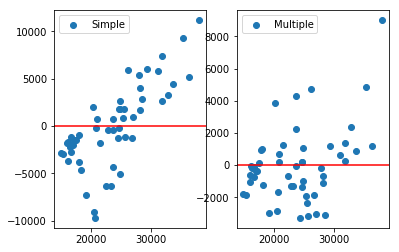

In [91]:
# For each model, plot the salary (`sl`) v.s. the *residuals* (difference between actual and predicted values)
# Add a horizontal line at 0 to help interpret the graph
# (I suggest rendering adjacent plots, though you are welcome to make them separately)
salary_data["simple_res"] = salary_data.sl - salary_data.predictions
salary_data["multiple_res"] = salary_data.sl - salary_data.mul_preds
plt.subplot(1, 2, 1)
plt.scatter(salary_data.sl, salary_data.simple_res, label = "Simple")
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(salary_data.sl,salary_data.multiple_res, label = "Multiple")
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.show()

Write at least **one observation** based on the residual plots above. More specifically, describe how each each model systematically fits (or _fails_ to fit) the data
**Answer:**
The model is better representing the problem, if the residual plot is randomly distributed and if we cannot observe any patterns. Here, we see that the multiple regression model is better than the simple linear regression model because the scatter plot is more random and at lower values for the multiple regression residual plot.